# Importing libraries

In [1]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report


# Reading the data

In [3]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum().sort_values(ascending=False)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Cleaning

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

**We will change every dash with underscore, '-' to '_'**

In [8]:
df.columns = df.columns.str.replace("-", "_")

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
df.isnull().sum().sort_values(ascending=False)

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

**We will check that every column has no invalid value**

In [11]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [13]:
df['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [14]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [15]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [16]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [17]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [19]:
df['native_country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [20]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

**We recognized that we got '?' in multiple column**

**so we will replace every '?'to null**

In [21]:
df.replace('?', np.nan, inplace=True)

**Now we can see the null value**

In [22]:
df.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native_country      857
age                   0
fnlwgt                0
education             0
educational_num       0
marital_status        0
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
income                0
dtype: int64

In [23]:
df.duplicated().sum()

52

**Filling the null values**

In [24]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df['occupation']=imputer.fit_transform(df[['occupation']]).ravel()
df['workclass']=imputer.fit_transform(df[['workclass']]).ravel()
df['native_country']=imputer.fit_transform(df[['native_country']]).ravel()
#ravel() is to match 1d array to 2d array

In [25]:
df.isnull().sum().sort_values(ascending=False)

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

**Dropping the duplicates**

In [26]:
df.duplicated().sum()
df.reset_index(drop=True, inplace=True)

# Important Note
**The duplicates was 52 before imputation but after it was 53**

**Some rows were previously almost identical except for a missing value — once the missing value is filled with the most frequent one, that row may now become exactly identical to another row.**

**So we should impute before dropping the duplicates**

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

# Removing outliers

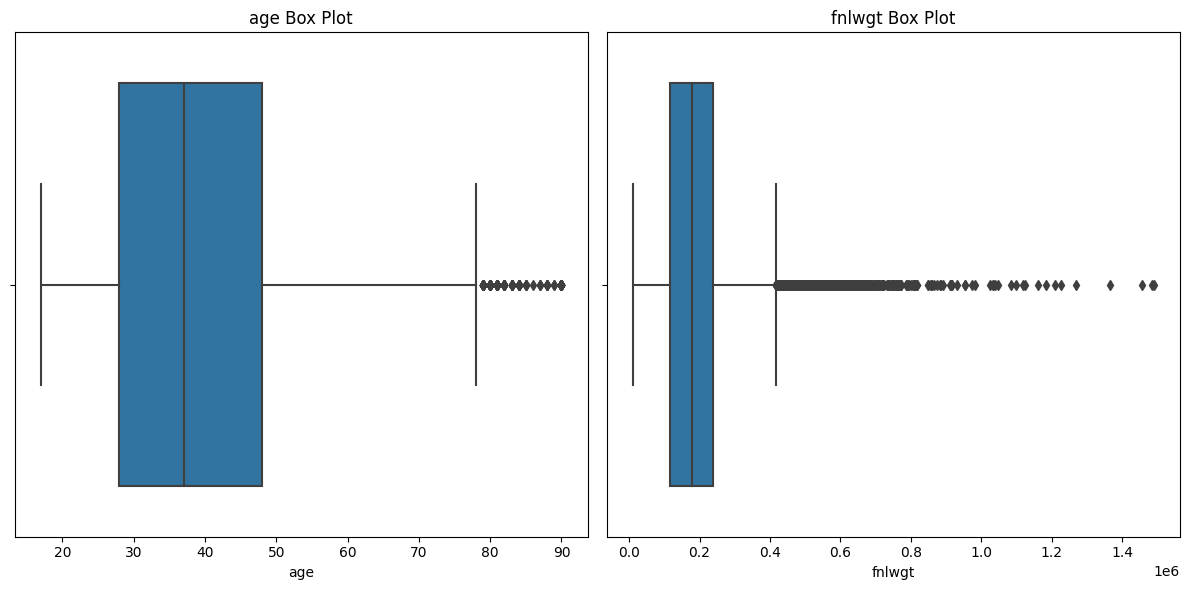

In [29]:
numerical_columns = ['age', 'fnlwgt']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')

plt.tight_layout()
plt.show()

In [30]:
for col in numerical_columns :
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

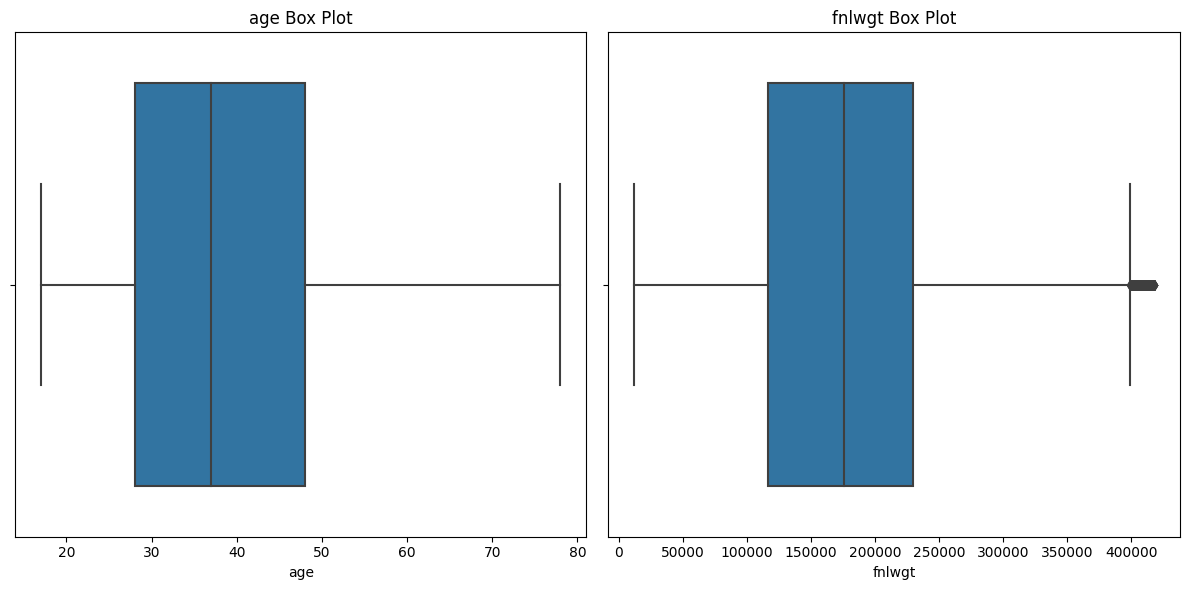

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')

plt.tight_layout()
plt.show()

In [32]:
df.shape

(47122, 15)

# Visulaization

<Axes: xlabel='age', ylabel='count'>

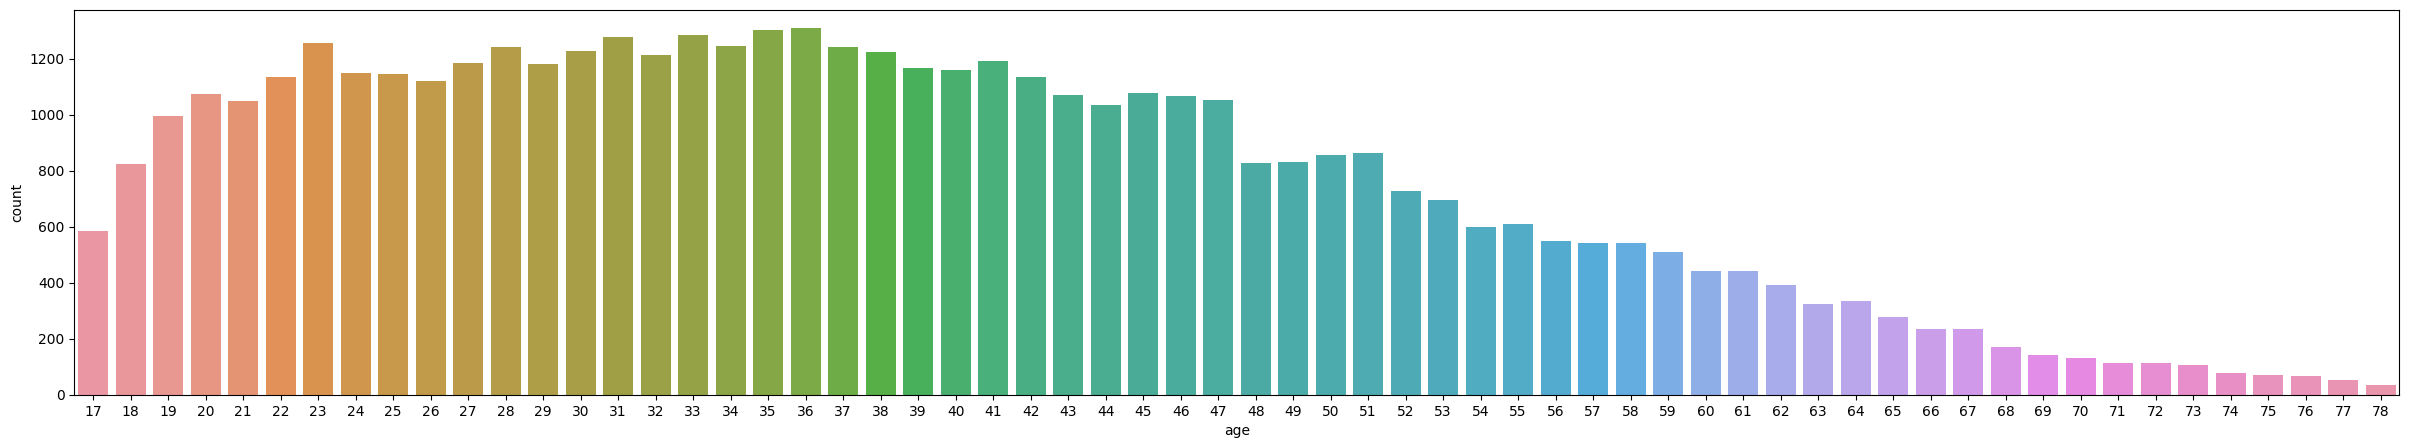

In [33]:
plt.figure(figsize=(30,5))
sns.countplot(x='age',data=df)    

<Axes: xlabel='workclass', ylabel='count'>

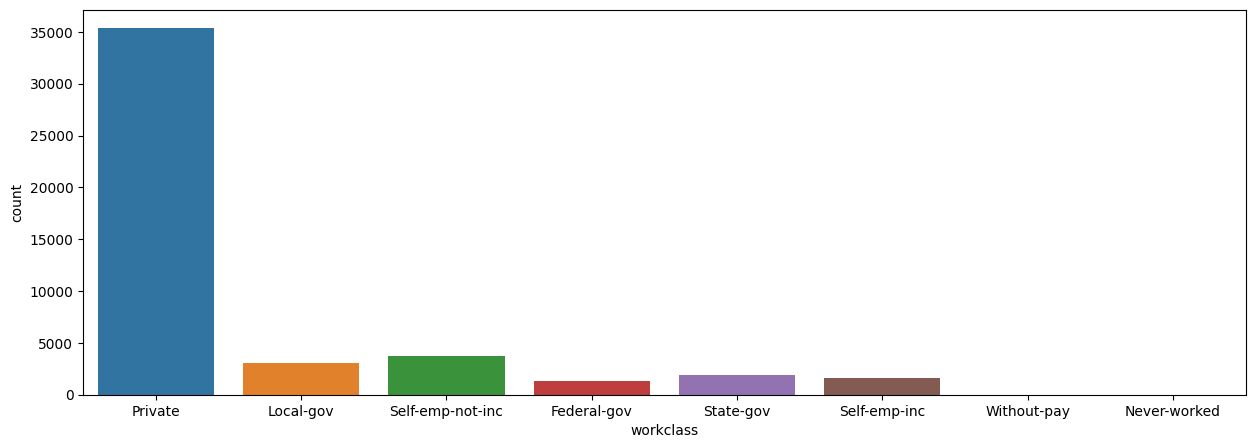

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='workclass',data=df)   

<Axes: xlabel='education', ylabel='count'>

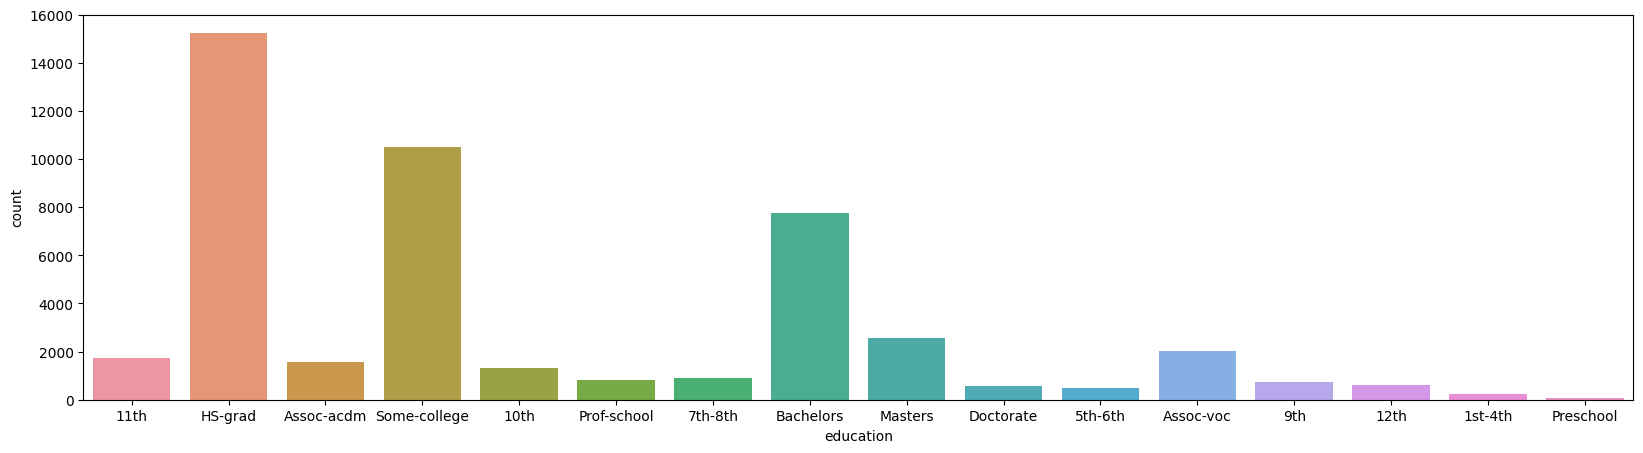

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(x='education',data=df)   

<Axes: xlabel='marital_status', ylabel='count'>

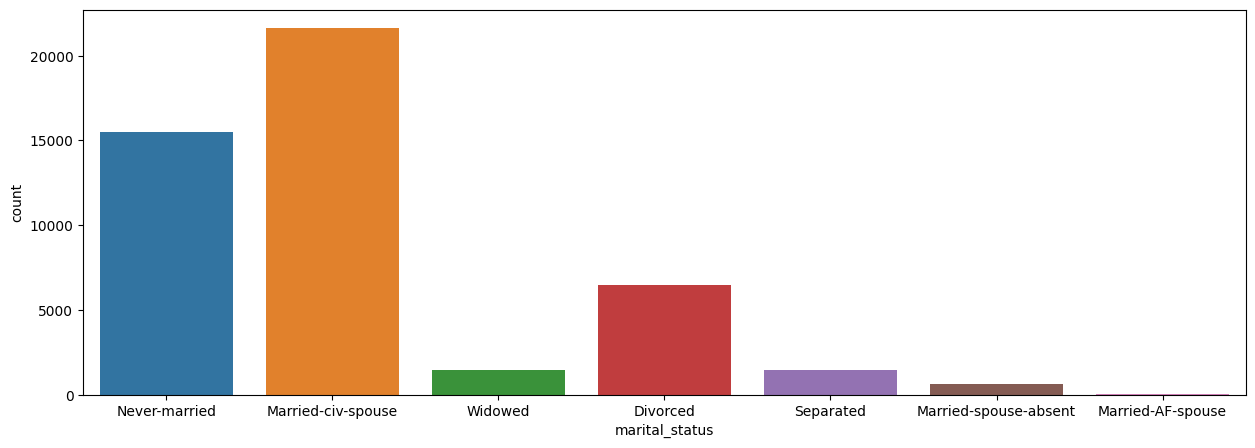

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status',data=df)

<Axes: xlabel='occupation', ylabel='count'>

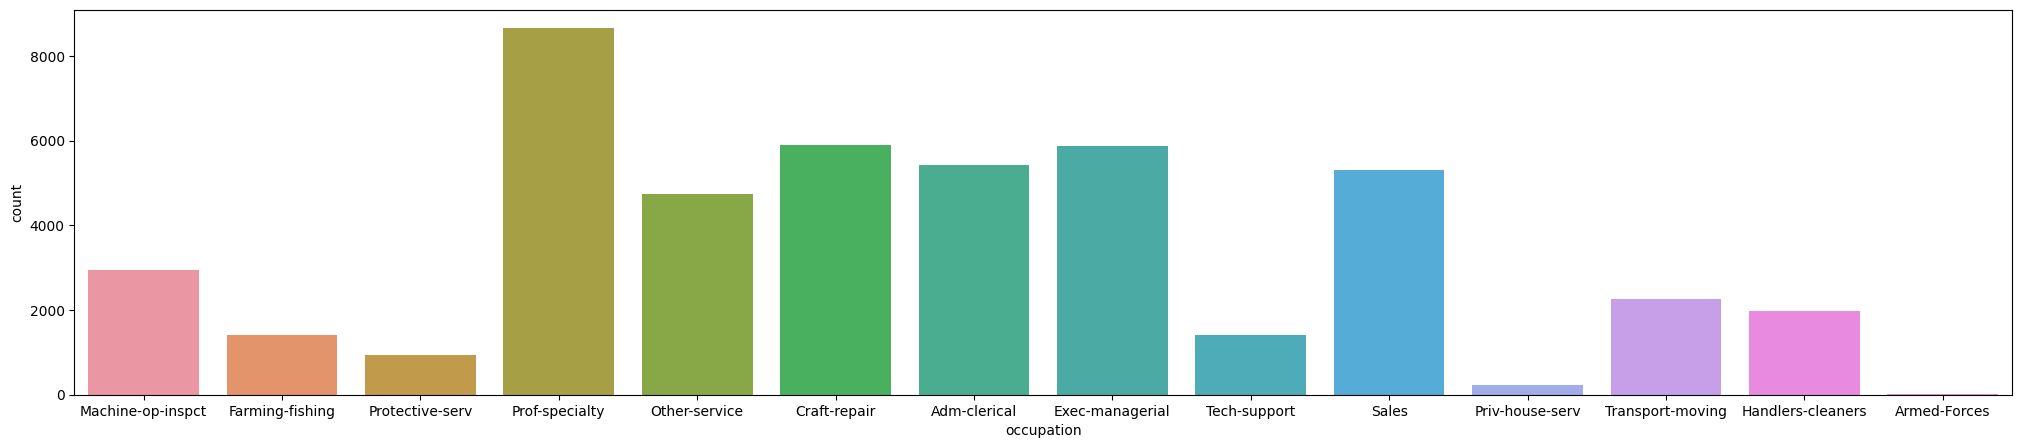

In [37]:
plt.figure(figsize=(25,5))
sns.countplot(x='occupation',data=df)

<Axes: xlabel='relationship', ylabel='count'>

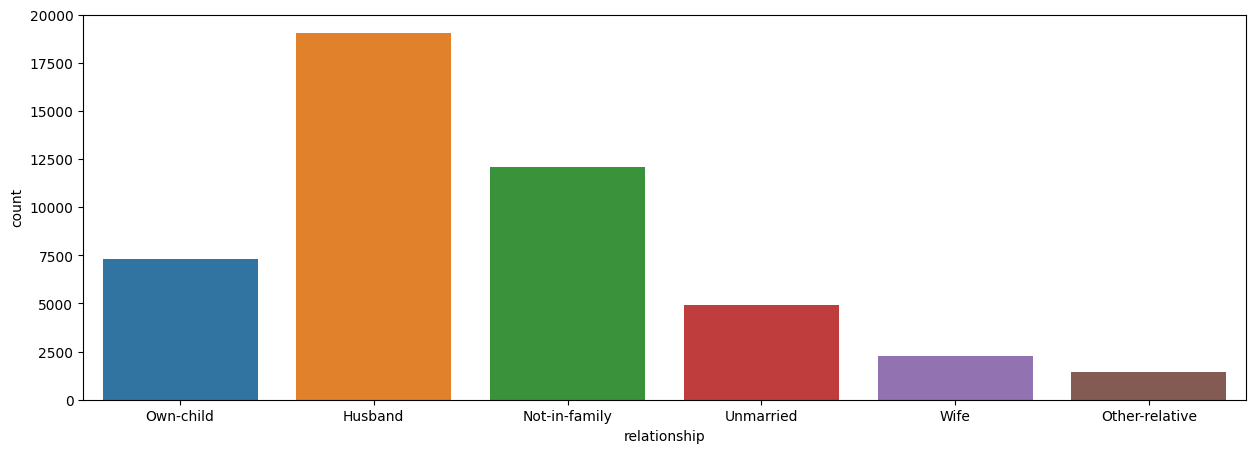

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='relationship',data=df)

<Axes: xlabel='race', ylabel='count'>

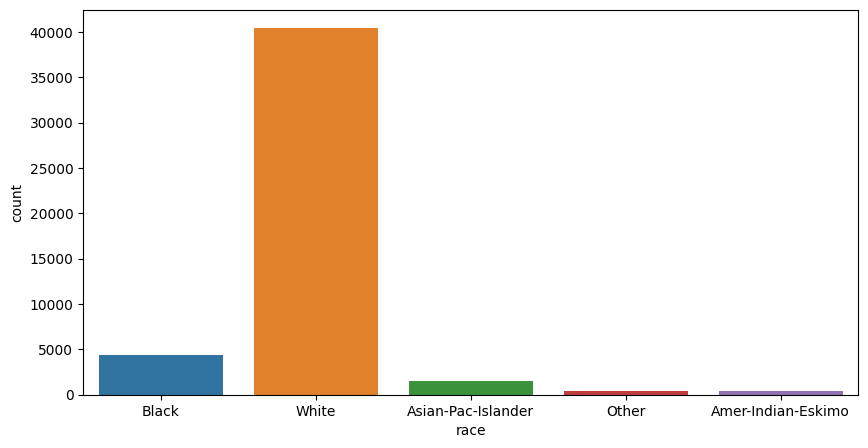

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='race',data=df)

Text(0.5, 1.0, 'Occupation vs Income Count')

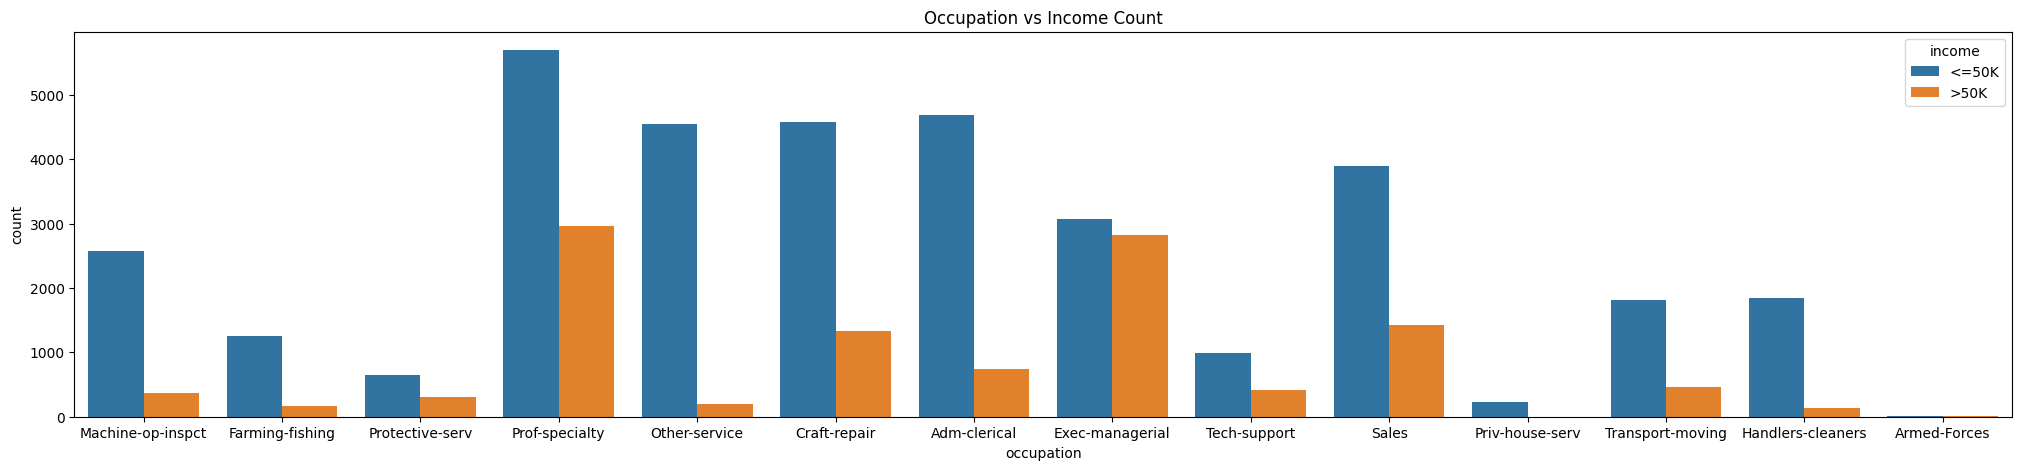

In [40]:
plt.figure(figsize=(25,5))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Occupation vs Income Count')

([<matplotlib.patches.Wedge at 0x7cba5200b110>,
 [Text(-0.5496400434616752, 0.9528356745123725, 'Male'),
  Text(0.549640043461675, -0.9528356745123726, 'Female')],
 [Text(-0.29980366007000464, 0.5197285497340213, ' 66.65 %'),
  Text(0.29980366007000453, -0.5197285497340214, ' 33.35 %')])

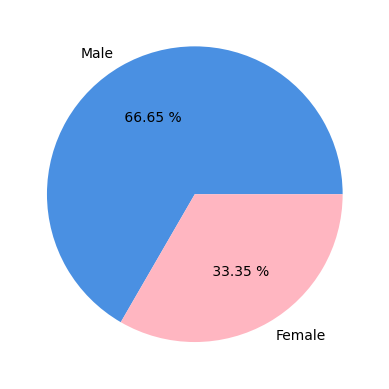

In [41]:
plt.pie(df['gender'].value_counts() , labels=['Male','Female'],autopct=' %.2f %%'
                                                               , colors=['#4A90E2','#FFB6C1'])

Text(0.5, 1.0, 'Occupation vs Income Gender')

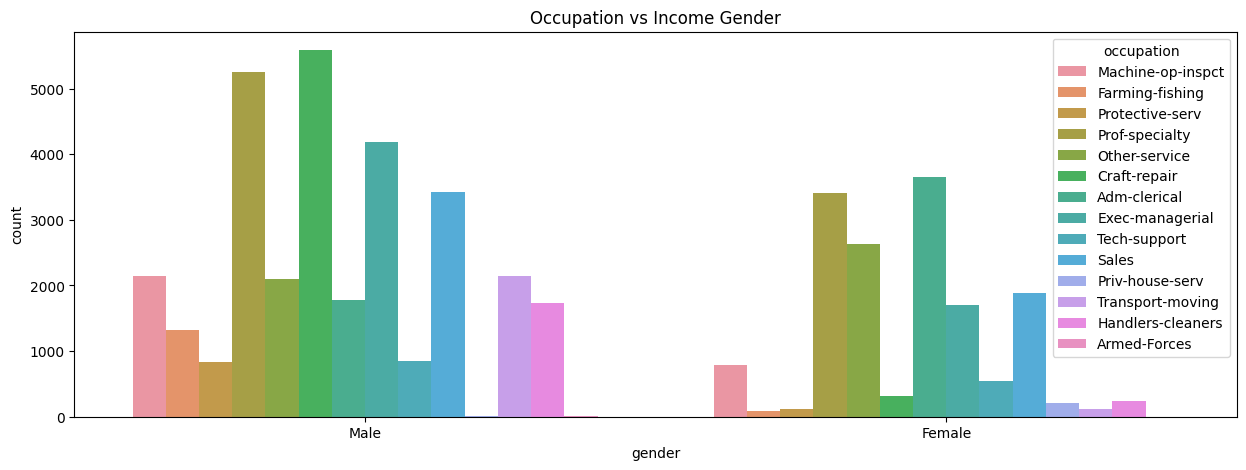

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='gender', hue='occupation')
plt.title('Occupation vs Income Gender')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

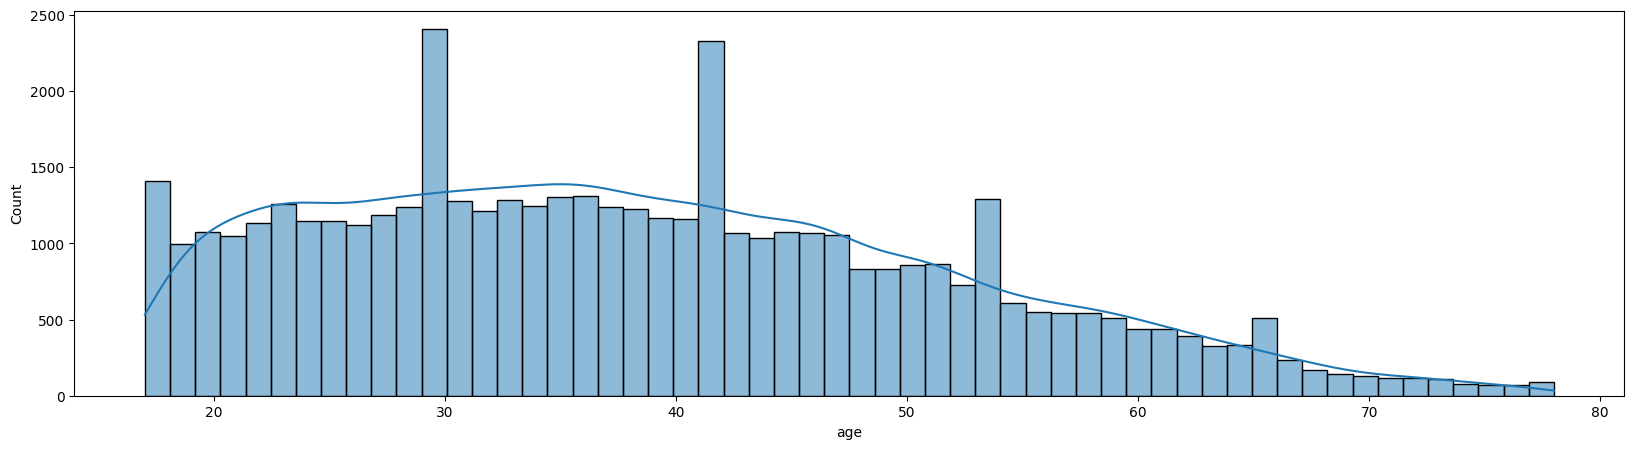

In [43]:
plt.figure(figsize=(20,5))
sns.histplot(x='age',data=df,kde=True)

Text(0.5, 1.0, 'Relationship vs Income Workclass')

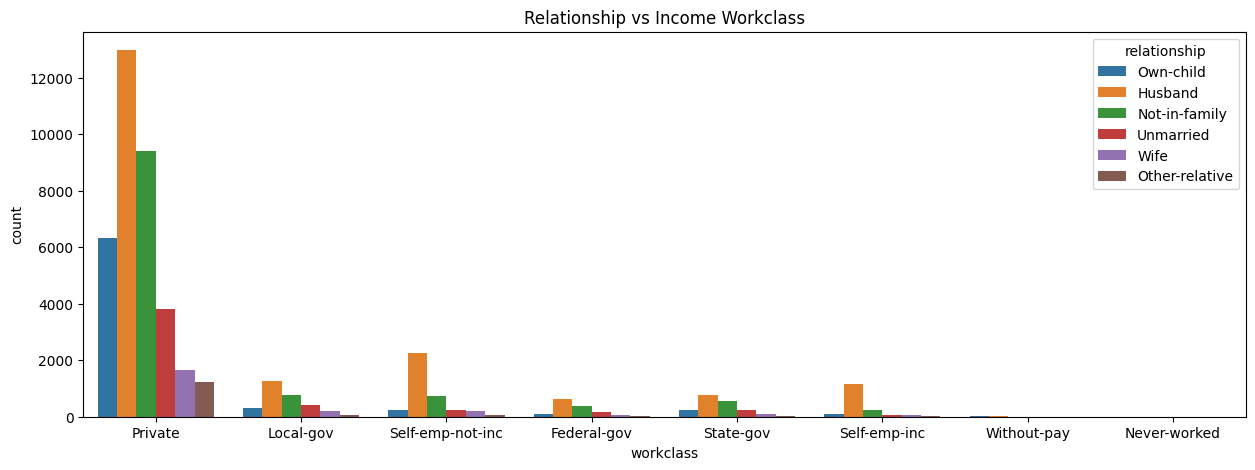

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='workclass',hue='relationship',data=df)
plt.title('Relationship vs Income Workclass')

# Data Preprocessing

**Encoding**

In [45]:
obj_columns = df.select_dtypes(include='object').columns

In [46]:
lb=LabelEncoder()
for col in obj_columns:
    df[col]=lb.fit_transform(df[col])

In [47]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


**Spliting and balancing the data**

In [48]:
x = df.drop('income',axis=1)
y = df['income']

In [49]:
#changing x and y to dataframes
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [51]:
df['income'].value_counts()

income
0    35787
1    11335
Name: count, dtype: int64

Text(0.5, 1.0, 'Income Distribution')

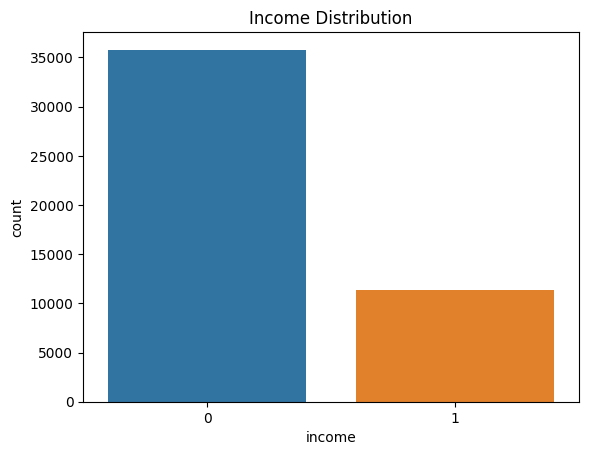

In [52]:
sns.countplot(data=df,x='income')
plt.title("Income Distribution")

**We see that the data is unbalanced**

**So we will resample it**

In [53]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

Text(0.5, 1.0, 'Income distribution after resampling')

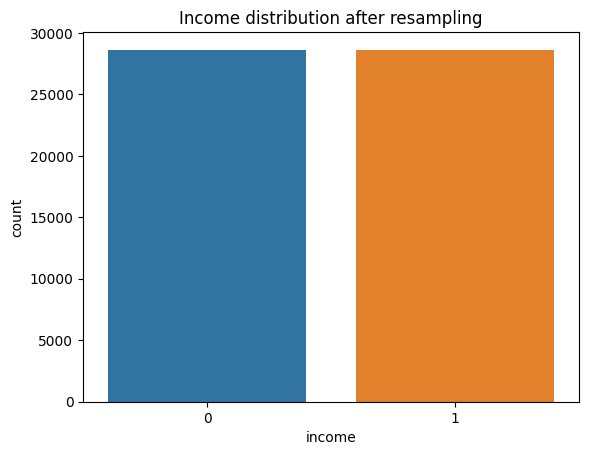

In [54]:
sns.countplot(data=y_train,x='income')
plt.title("Income distribution after resampling")

# Scaling

In [55]:
scaler_X = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled  = scaler_X.transform(x_test)

# Machine Learning Models

**Using (Logistics Regression , Naive Bayes, KNN, Decision Tree, Random Forest, SVC)**

In [56]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier( max_depth=10,random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='linear', C=1.0)
}

In [57]:
accuracy = []
conf_matrices = {}

from tqdm import tqdm
for model_name, model in tqdm(models.items()):
    # Train
    model.fit(x_train_scaled, y_train)
    
    # Predict once on train and once on test
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test  = model.predict(x_test_scaled)
    
    # Compute train metrics
    acc_train      = accuracy_score(y_train, y_pred_train)
    pres_train     = precision_score(y_train, y_pred_train, average='weighted')
    recall_train   = recall_score(y_train, y_pred_train, average='weighted')
    f1_train       = f1_score(y_train, y_pred_train, average='weighted')
    
    # Compute test metrics
    acc_test       = accuracy_score(y_test, y_pred_test)
    pres_test      = precision_score(y_test, y_pred_test, average='weighted')
    recall_test    = recall_score(y_test, y_pred_test, average='weighted')
    f1_test        = f1_score(y_test, y_pred_test, average='weighted')
    
    # Store results
    accuracy.append([
        acc_train, pres_train, recall_train, f1_train,
        acc_test,  pres_test,  recall_test,  f1_test
    ])
    # Save confusion matrix for test set
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred_test)

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 17%|█▋        | 1/6 [00:00<00:03,  1.39it/s]/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50%|█████     | 3/6 [00:01<00:01,  2.75it/s]/tmp/ipykernel_13/2343340958.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_scaled, y_train)
 67%|██████▋   | 4/6 [00:06<00:04,  2.16s/it]/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.p

In [58]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train",
                               "F1_Train","Acc_Test","pre_Test",
                               "Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
LogisticRegression,0.773289,0.773654,0.773289,0.773214,0.759469,0.813677,0.759469,0.773873
GaussianNB,0.717769,0.763604,0.717769,0.704943,0.829920,0.819653,0.829920,0.819841
Decision Tree Classifier,0.872158,0.872463,0.872158,0.872131,0.835438,0.839418,0.835438,0.837190
Random Forest Classifier,0.882497,0.882817,0.882497,0.882472,0.838833,0.852294,0.838833,0.843485
KNN Classifier,0.899507,0.899653,0.899507,0.899498,0.807003,0.819652,0.807003,0.811889
SVC,0.774774,0.777579,0.774774,0.774203,0.746101,0.817341,0.746101,0.762927


# Confusion Maxrix

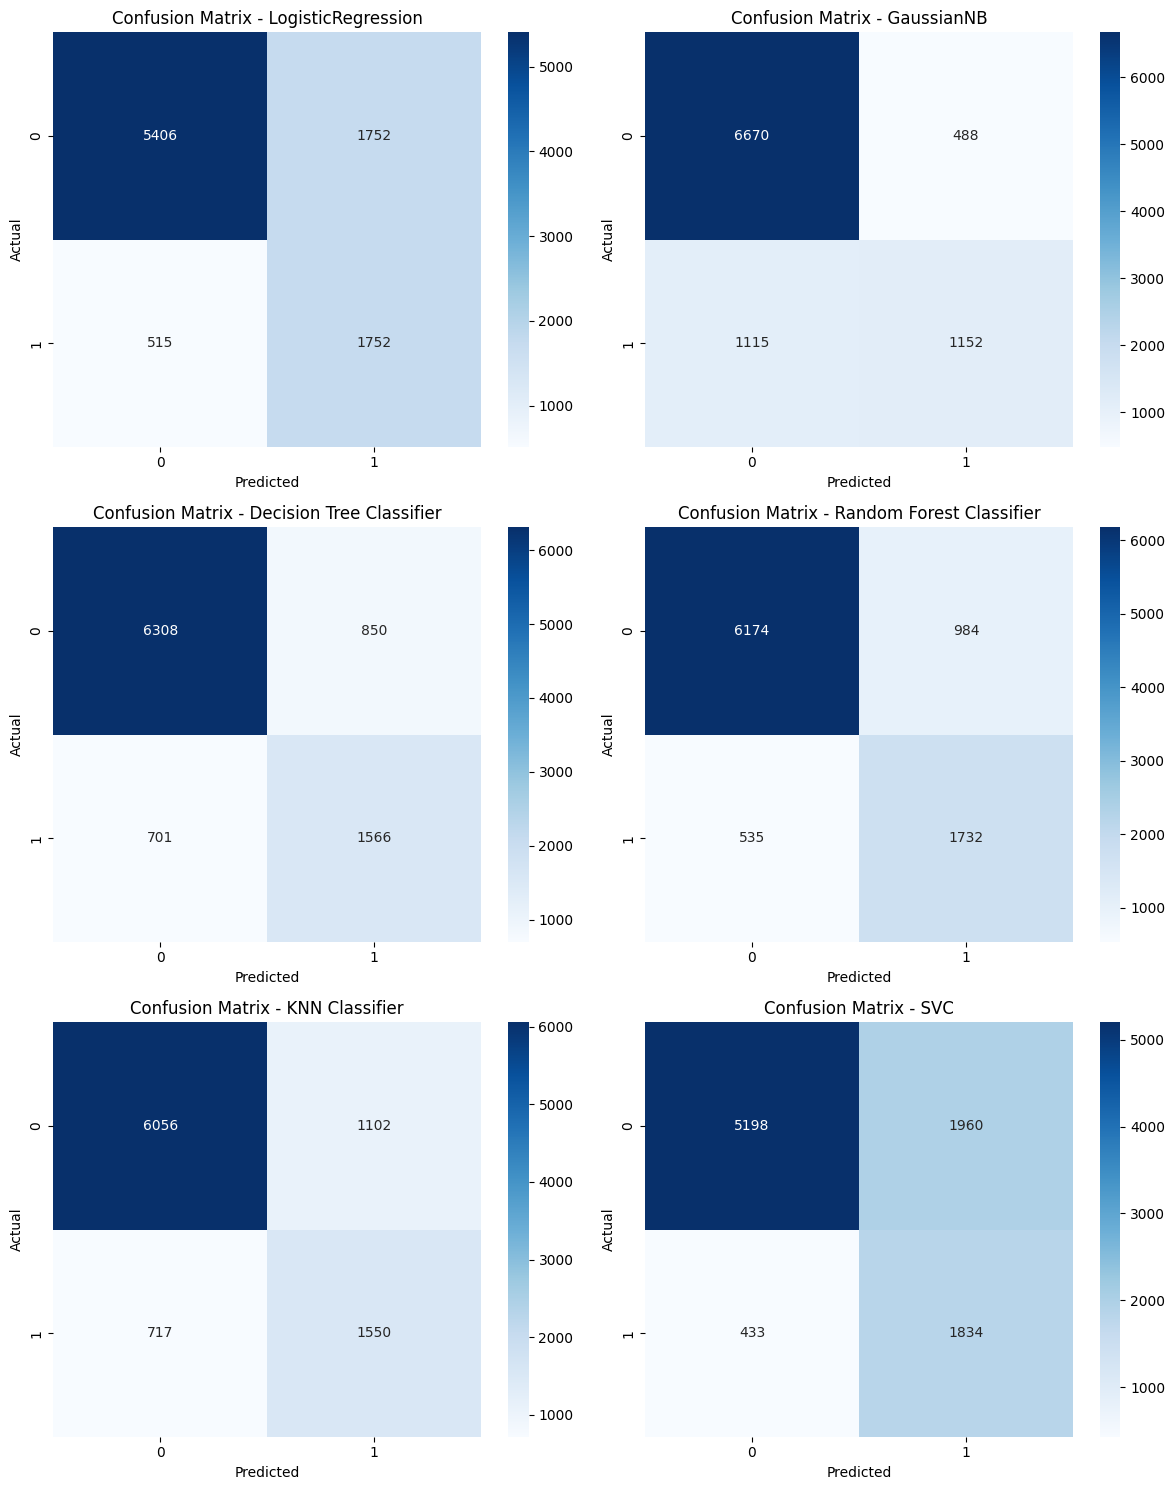

In [59]:
n_models = len(conf_matrices)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for idx, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# If there are empty subplots, remove them
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()